### Outline

1. [Goals & Notations](#section_1)
2. [Problem Statement](#section_2)
3. [Model Prediction With Multiple Variable](#section_3)
4. [Compute Cost With Multiple Variable](#section_4)
5. [Gradient Descent With Multiple Variable](#section_5)

#### <a name="section_1"></a> Goals & Notations

#### Goals

Extend our regression model routines to support multiple features

 - Extend data structures to support multiple features
 - Rewrite prediction, cost and gradient routines to support multiple features
 - Utilize NumPy np.dot to vectorize their implementations for speed and simplicity

#### Notations

![Notations](./img_mv_notations.JPG)

In [3]:
# imports

import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

#### <a name="section_2"></a> Problem Statement

![problem statement](./img_prob_stmt_mv_lr.JPG)

In [4]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

#### Input & Output Data Matrices

![](./img_mv_rep.JPG)

In [5]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


#### Model Parameters

![](./img_mv_params.JPG)

In [7]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


#### <a name="section_3"></a> Model Prediction With Multiple Variable

![](./img_mv_reg_model.JPG)

Note:
 - note that np.dot is much faster than loop approach as numpy uses parallel computing in the background

In [8]:
# for demonstrations purpose let
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [13]:
# calculate single model output using looping
def predict_single_loop(x, w, b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = w[i] * x[i]
        p += p_i
    p = p + b
    return p

In [14]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [15]:
# calculate singe model output using vector dot product
def predict (x, w, b):
    p = np.dot(w, x) + b
    return p

In [16]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


#### <a name="section_4"></a> Compute Cost With Multiple Variable

![](./img_mv_compute_cost.JPG)

In [20]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

In [21]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


#### <a name="section_5"></a> Gradient Descent With Multiple Variables

![](./img_mv_gd_formula.JPG)

In [24]:
# computing gradient

def compute_gradient (X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_db, dj_dw

In [25]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [26]:
# gradient descent with multiple variables

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    
    for i in range (num_iters):
        
        # calculate gradients
        dj_db, dj_dw = gradient_function (X, y, w, b)
        
        # update params using w, b, alpha & gradients
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # save cost J at each iteration
        if i < 100000:
            J_history.append (cost_function(X, y, w, b))
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history

In [30]:
# running gradient descent

initial_w = np.zeros_like(w_init)
initial_b = 0.0

iterations = 10000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost  2529.46   
Iteration 1000: Cost   686.69   
Iteration 2000: Cost   677.19   
Iteration 3000: Cost   668.48   
Iteration 4000: Cost   660.50   
Iteration 5000: Cost   653.19   
Iteration 6000: Cost   646.49   
Iteration 7000: Cost   640.35   
Iteration 8000: Cost   634.72   
Iteration 9000: Cost   629.56   
b,w found by gradient descent: -0.02,[ 0.22  0.03 -0.11 -0.58] 


In [41]:
# using trained model to predict
print (f"X_train=\n {X_train}")
print (f"\ny_train=\n {y_train}\n\n")

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final}\n")

m = X_train.shape[0]
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final: 0.5f}, target value: {y_train[i]}")

X_train=
 [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]

y_train=
 [460 232 178]


b,w found by gradient descent: -0.02,[ 0.22  0.03 -0.11 -0.58]

prediction:  430.50230, target value: 460
prediction:  283.93451, target value: 232
prediction:  164.52212, target value: 178


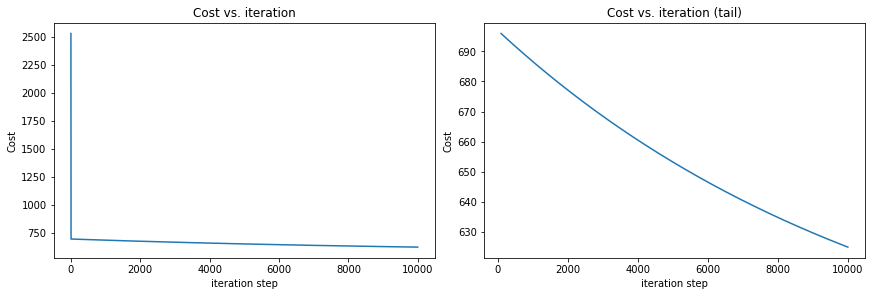

In [43]:
# plotting cost vs iterations

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration")
ax2.set_title("Cost vs. iteration (tail)")

ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost') 

ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step') 

plt.show()